##SUPERMARKET SALES ANALYSIS

Importando librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy

Variables Globales

In [3]:
global df_ventas
global df_ventas_limpio

*Importando la Base de Datos .csv*

In [55]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv('reporte_ventas.csv', sep = ',')
obtencion_datos()

Normalización y limpieza de los datos

In [56]:
#Formateamos el tipo de dato de las fechas a uno adecuado
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

#Eliminar repetidos
df_ventas_limpio = df_ventas.drop_duplicates()

#eliminamos registros de prueba
def eliminar_registros_prueba(df):
  return df.drop(df[df['nombre_cliente'] == 'prueba'].index)
df_ventas_limpio = eliminar_registros_prueba(df_ventas_limpio)

#reiniciamos el index
df_ventas_limpio.reset_index(inplace=True)
df_ventas_limpio.drop(columns=['index'], inplace=True)

#Reemplazamos los nombres de clientes NaN por el valor "missing"
df_ventas_limpio['nombre_cliente'].fillna('missing', inplace=True)


1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño? (Pablo)

In [ ]:
#Code here
df_ventas_limpio

2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?

In [ ]:
#Code here
df_ventas_limpio

3. ¿Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas? (Jhojan)

In [ ]:
#Code here
df_ventas_limpio

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envío rápido,676,673
Económico,829,906
Entrega estándar,2550,2806


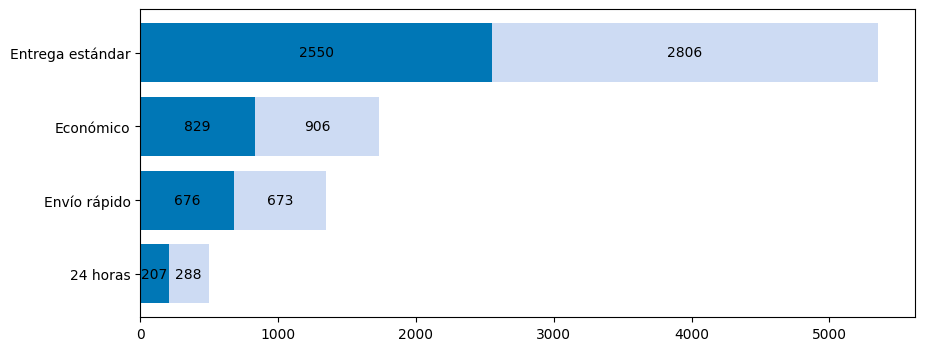

In [127]:
#Code here
# modo_envio = df_ventas_limpio['modo_envio'].value_counts() #Entrega estándar    5356
# criterio = df_ventas_limpio['modo_envio'] == 'Entrega estándar'

# modo_envio_por_segmentos = df_ventas_limpio[criterio]['segmento_cliente'].value_counts()

# modo_envio_por_segmentos.plot(kind='bar')



#Preparando los datos
df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
modo_envio = df_modo_envio['modo_envio']
segmento = df_modo_envio['segmento_cliente']
df_modo_envio = pd.crosstab(index=modo_envio, columns=segmento).sort_values('B2B')
#Graficando
fig, ax = plt.subplots(figsize=(10,4))
x = df_modo_envio.index
y1 = df_modo_envio['B2B']
y2 = df_modo_envio['B2C']
ax.barh(x, y1, color='#0077b6')
ax.barh(x, y2, left=y1, color='#CDDBF3')

for container in ax.containers:
  # values = [valor for valor in container]
  ax.bar_label(container, label_type='center', labels = ())

# for label in values:
#   # print(label.get_bbox().x0)
#   print(label.get_bbox().x1)
# # df_modo_envio
df_modo_envio


5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo? (Everardo)

In [ ]:
#Code here
df_ventas_limpio

6. ¿Existe otro insight que puedas proporcionar?

In [ ]:
#Code here
df_ventas_limpio